In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import plotly.express as px
import plotly.graph_objects as go


/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', delimiter = '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<AxesSubplot:>

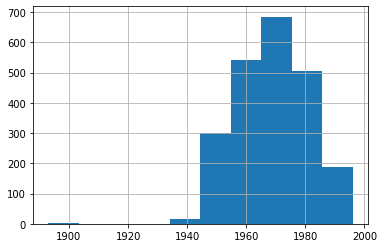

In [5]:
df['Year_Birth'].hist()

In [6]:
def isNull(df):
    col = (df.isnull().sum())
    col = col[col > 0]
    print(col)

isNull(df)

Income    24
dtype: int64


In [7]:
df['Income'] = df['Income'].fillna(df.Income.mean())

In [8]:
isNull(df)

Series([], dtype: int64)


In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = pd.datetime.now().year - df['Year_Birth']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [11]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df['Family_Size'] = None
# df.drop(['Kidhome','Teenhome','Year_Birth'], axis = 1)
for i in range(len(df)):
    df['Family_Size'][i] = df['Children'][i] + (1 if (df['Marital_Status'][i] in ['Single', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO']) else 2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
amount_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

df['Total_Spent'] = sum(df[col] for col in amount_cols)

In [14]:
quantity_cols = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']

df['Total_Quantity'] = sum(df[col] for col in quantity_cols)


In [15]:
df = df.drop([*amount_cols, *quantity_cols, 'Year_Birth', 'Kidhome','Teenhome'], axis = 1)

In [16]:
promotion_accepted_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']

df['Promotion_Accepted'] = sum(df[col] for col in promotion_accepted_cols)

In [17]:
df = df.drop([*promotion_accepted_cols], axis = 1)

In [18]:
df

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Family_Size,Total_Spent,Total_Quantity,Promotion_Accepted
0,5524,Graduation,Single,58138.0,04-09-2012,58,7,0,3,11,1,0,64,1,1617,25,0
1,2174,Graduation,Single,46344.0,08-03-2014,38,5,0,3,11,0,2,67,3,27,6,0
2,4141,Graduation,Together,71613.0,21-08-2013,26,4,0,3,11,0,0,56,2,776,21,0
3,6182,Graduation,Together,26646.0,10-02-2014,26,6,0,3,11,0,1,37,3,53,8,0
4,5324,PhD,Married,58293.0,19-01-2014,94,5,0,3,11,0,1,40,3,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,13-06-2013,46,5,0,3,11,0,1,54,3,1341,18,0
2236,4001,PhD,Together,64014.0,10-06-2014,56,7,0,3,11,0,3,75,5,444,22,1
2237,7270,Graduation,Divorced,56981.0,25-01-2014,91,6,0,3,11,0,0,40,1,1241,19,1
2238,8235,Master,Together,69245.0,24-01-2014,8,3,0,3,11,0,1,65,3,843,23,0


In [19]:
import matplotlib.pyplot as plt 
# plt.scatter(*[])

fig = go.Figure()
fig.add_trace(dict(x = df['Children'], y = df['Total_Spent'],mode = 'markers'))
fig.update_layout(dict(title = 'Plot', xaxis_title = 'Children', yaxis_title = 'Spent'))
fig.show()

In [20]:
params = {'Total_Spent', 'Total_Quantity', 'Income'}

from sklearn.cluster import KMeans

In [21]:
from sklearn.preprocessing import StandardScaler
df_clust = df[[*params]].copy()

for i in df_clust.columns:
    df_clust[i] = StandardScaler().fit_transform(np.array(df_clust[[i]]))

In [22]:
df_clust

,Total_Spent,Income,Total_Quantity
0,1.679417,0.235327,1.320826
1,-0.961275,-0.235826,-1.154596
2,0.282673,0.773633,0.799685
3,-0.918094,-1.022732,-0.894025
4,-0.305254,0.241519,0.539114
...,...,...,...
2235,1.221032,0.358568,0.408829
2236,-0.268717,0.470064,0.929970
2237,1.054951,0.189106,0.539114
2238,0.393948,0.679035,1.060255


In [23]:
import seaborn as sns
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, random_state = 69)
    km.fit(df_clust)
    wcss.append(km.inertia_)




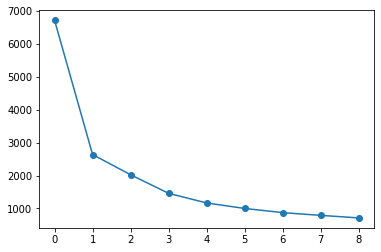

In [24]:
plt.plot(wcss, '-o')

In [25]:
k = 3
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 69)


In [26]:
y = kmeans.fit_predict(df_clust)
df['Cluster'] = y
df['Cluster'].value_counts()

0    984
2    641
1    615
Name: Cluster, dtype: int64

<BarContainer object of 3 artists>

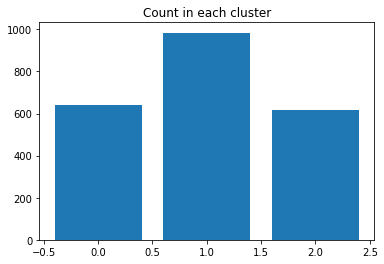

In [27]:
plt.figure()
plt.title('Count in each cluster')
plt.bar(df['Cluster'].unique(),df['Cluster'].value_counts())

In [28]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()
traces = []

for clusterid in df['Cluster'].unique():
    X = df.loc[df['Cluster'] == clusterid, 'Income'].values
    y = df.loc[df['Cluster'] == clusterid, 'Total_Spent'].values
    tempTrace = go.Scatter(name = str(clusterid), x = X, y = y, mode = 'markers')
    traces.append(tempTrace)
    
for trace in traces:
    fig.add_trace(trace)

fig.update_layout(
    title="2D Customer Segmentation",
    xaxis_title="Income",
    yaxis_title="Total Money Spent",
    font=dict(
        family="Roboto",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(range=[0,150000])
fig.show()

In [29]:

fig = go.Figure()
traces = []

for clusterid in df['Cluster'].unique():
    X = df.loc[df['Cluster'] == clusterid, 'Income'].values
    y = df.loc[df['Cluster'] == clusterid, 'Total_Spent'].values
    z = df.loc[df['Cluster'] == clusterid, 'Total_Quantity'].values
    
    tempTrace = go.Scatter3d(name = str(clusterid), x = X, y = y, z = z, mode = 'markers', marker = dict(size = 2))
    traces.append(tempTrace)
    
for trace in traces:
    fig.add_trace(trace)

fig.update_layout(
    title="3D Customer Segmentation",

    font=dict(
        family="Roboto",
        size=10,
        color="RebeccaPurple"
    )
)


fig.update_layout(
    scene = dict(
                    xaxis = dict(nticks=4, range=[0,150000],),
                     yaxis = dict(nticks=4, range=[0,2500],),
                     zaxis = dict(nticks=4, range=[0,40],),
                    xaxis_title='Income',
                    yaxis_title='Total Amount Spent',
                    zaxis_title='Total Quantity Purchased')
)
fig.show()